In [1]:
%pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
df = pd.read_csv("../data/temp_electricity.csv")

In [4]:
df.head()

Datetime  Consommation               Regions               Nature  year  \
0  2020-01-01      403787.0  Auvergne-Rhône-Alpes  Données définitives  2020   
1  2020-01-02      443531.0  Auvergne-Rhône-Alpes  Données définitives  2020   
2  2020-01-03      434626.0  Auvergne-Rhône-Alpes  Données définitives  2020   
3  2020-01-04      395169.0  Auvergne-Rhône-Alpes  Données définitives  2020   
4  2020-01-05      400169.0  Auvergne-Rhône-Alpes  Données définitives  2020   

   month  day  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  GWETROOT  ...      PS  \
0      1    1              5.494              6.860     0.768  ...  97.706   
1      1    2              4.532              6.448     0.768  ...  97.484   
2      1    3              3.846              6.454     0.766  ...  97.456   
3      1    4              4.684              7.002     0.766  ...  97.844   
4      1    5              6.516              7.210     0.766  ...  97.850   

    QV2M    RH2M    T2M  T2M_MAX  T2M_MIN  T2M_RANGE   WD10M  WS10M   WS2M  
0  3.690  87.752  0.940    4.552   -0.758      5.310  291.10  1.938  1.168  
1  4.194  87.350  2.642    7.794   -0.600      8.394  175.38  3.454  2.140  
2  4.872  89.086  4.570    8.598    1.944      6.654  196.00  2.976  1.748  
3  4.846  94.106  3.732    7.036   -0.244      7.280  276.04  3.874  2.512  
4  3.932  91.162  1.246    5.364   -1.542      6.906  236.76  3.654  2.338  

[5 rows x 22 columns]

In [5]:
df.columns

Index(['Datetime', 'Consommation', 'Regions', 'Nature', 'year', 'month', 'day',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'GWETROOT', 'GWETTOP',
       'PRECTOTCORR', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'WD10M', 'WS10M', 'WS2M'],
      dtype='object')

### Data Cleaning and Preprocessing 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21924 entries, 0 to 21923
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           21924 non-null  object 
 1   Consommation       21924 non-null  float64
 2   Regions            21924 non-null  object 
 3   Nature             21924 non-null  object 
 4   year               21924 non-null  int64  
 5   month              21924 non-null  int64  
 6   day                21924 non-null  int64  
 7   ALLSKY_SFC_SW_DWN  21924 non-null  float64
 8   CLRSKY_SFC_SW_DWN  21924 non-null  float64
 9   GWETROOT           21924 non-null  float64
 10  GWETTOP            21924 non-null  float64
 11  PRECTOTCORR        21924 non-null  float64
 12  PS                 21924 non-null  float64
 13  QV2M               21924 non-null  float64
 14  RH2M               21924 non-null  float64
 15  T2M                21924 non-null  float64
 16  T2M_MAX            219

<Axes: >

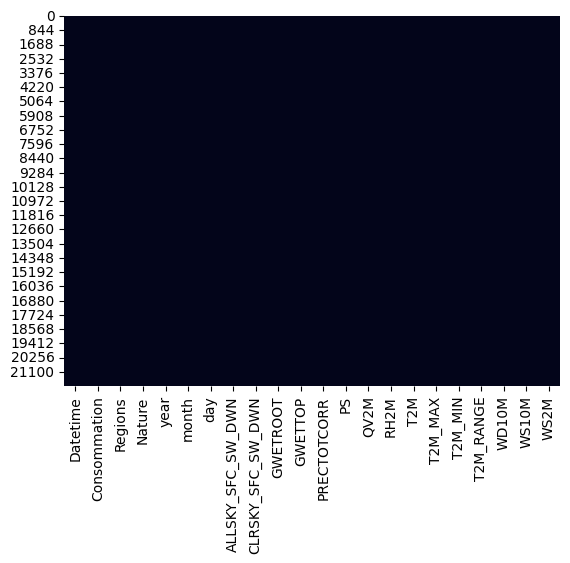

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df["Datetime"] = pd.to_datetime(df["Datetime"])


In [9]:
df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek  # 0=Mon
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)


In [10]:
df[["Consommation","T2M","T2M_MAX","ALLSKY_SFC_SW_DWN","T2M_MIN","PRECTOTCORR","RH2M","WD10M","PS","WS10M"]].describe()

Consommation           T2M       T2M_MAX  ALLSKY_SFC_SW_DWN  \
count   21924.000000  21924.000000  21924.000000       21924.000000   
mean   204433.967843     12.442940     16.998125          12.961568   
std     94293.008281      6.667029      7.493208           7.852625   
min     58376.000000     -6.362000     -2.690000           0.700000   
25%    125892.500000      7.517500     11.288000           5.876000   
50%    191000.500000     12.108000     16.614000          12.028000   
75%    262712.500000     17.610500     22.530500          19.176000   
max    624804.000000     32.044000     41.378000          31.250000   

            T2M_MIN   PRECTOTCORR          RH2M         WD10M            PS  \
count  21924.000000  21924.000000  21924.000000  21924.000000  21924.000000   
mean       8.255299      2.075674     79.604627    193.231263     99.084231   
std        5.905712      3.444000     11.288745     84.581202      1.838204   
min      -10.242000      0.000000     29.186000      2.560000     93.032000   
25%        4.034000      0.058000     72.921500    133.655000     97.451500   
50%        8.176000      0.508000     81.229000    209.620000     99.500000   
75%       12.754000      2.678000     88.384000    256.380000    100.578000   
max       25.024000     54.108000     99.096000    358.400000    103.672000   

              WS10M  
count  21924.000000  
mean       4.382351  
std        1.942625  
min        0.996000  
25%        2.933500  
50%        3.960000  
75%        5.418000  
max       15.700000

#### Commentaire 


## Visualization 


### Daily trend

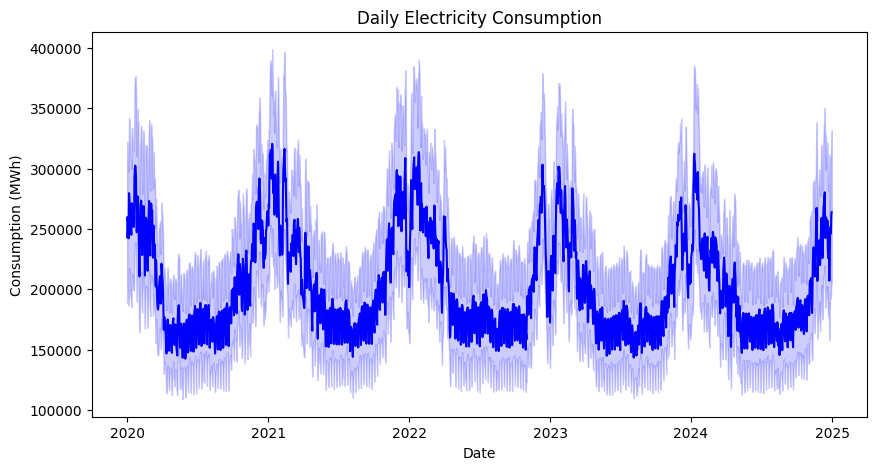

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Datetime", y="Consommation", color='blue')
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")
plt.show()

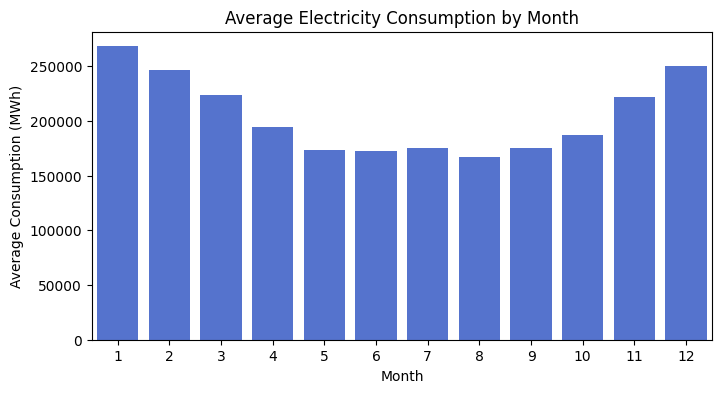

In [12]:
monthly_avg = df.groupby("month")["Consommation"].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color="royalblue")
plt.title("Average Electricity Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption (MWh)")
plt.show()

### Relationship between temperature and consumption

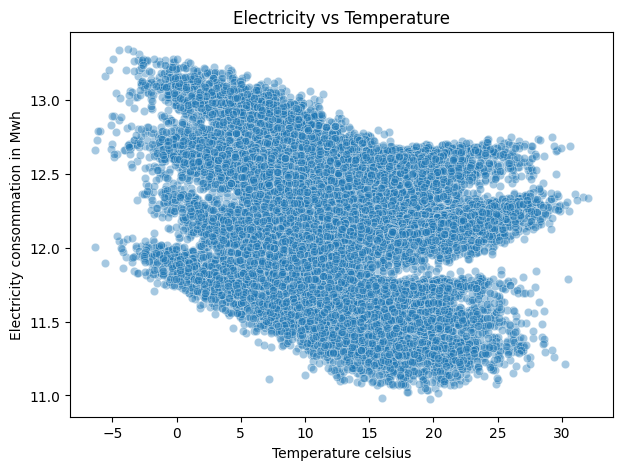

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="T2M",y=np.log(df["Consommation"]),alpha = 0.4)
plt.title("Electricity vs Temperature")
plt.xlabel("Temperature celsius")
plt.ylabel("Electricity consommation in Mwh")
plt.show()

### Regional comparison 

In [14]:
# plt.figure(figsize=(10,5))
# region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)
# sns.barplot(x=region_mean.index, y=region_mean.values, palette="viridis")
# plt.xticks(rotation=45)
# plt.title("Average Consumption by Regions")
# plt.ylabel("Mean Daily Consumption Mwh")
# plt.xlabel("Regions in France")
# plt.show()


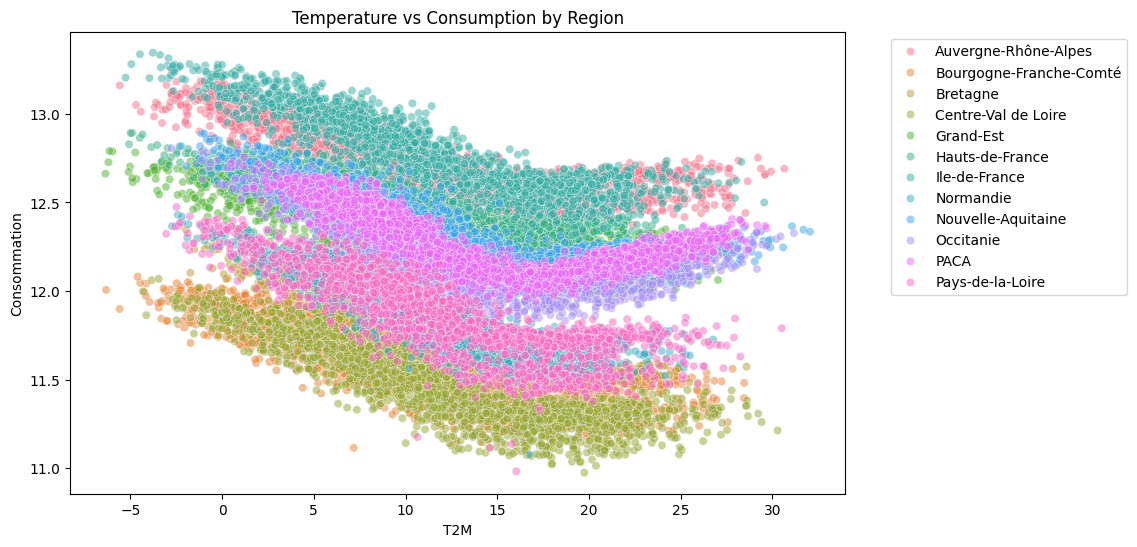

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="T2M", y=np.log(df["Consommation"]), hue="Regions", data=df, alpha=0.5)
plt.title("Temperature vs Consumption by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Solar Radiation and Consommation

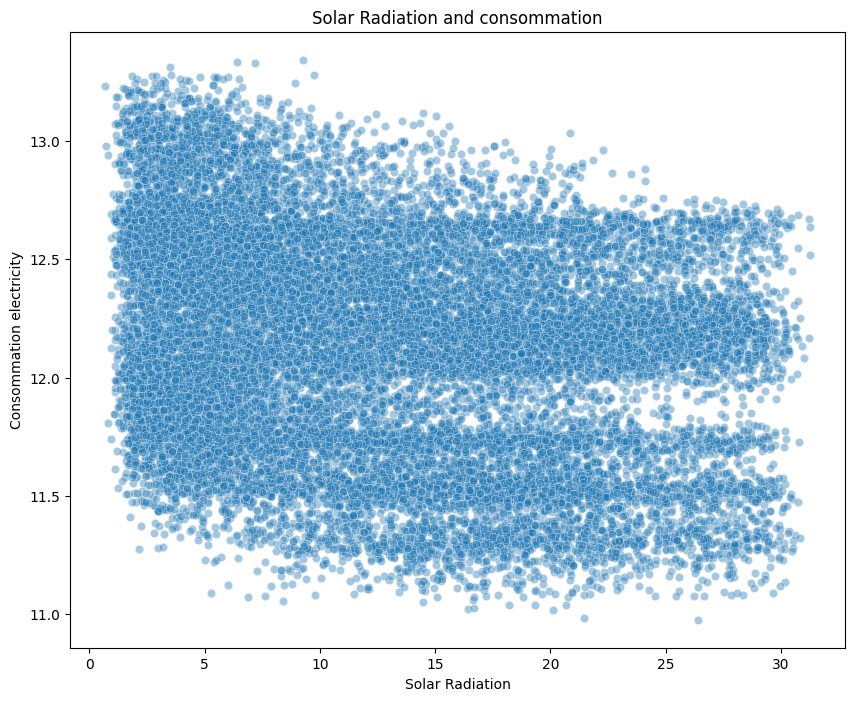

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="ALLSKY_SFC_SW_DWN", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Solar Radiation and consommation")
plt.xlabel("Solar Radiation")
plt.ylabel("Consommation electricity")
plt.show()

### Humidity vs consommation

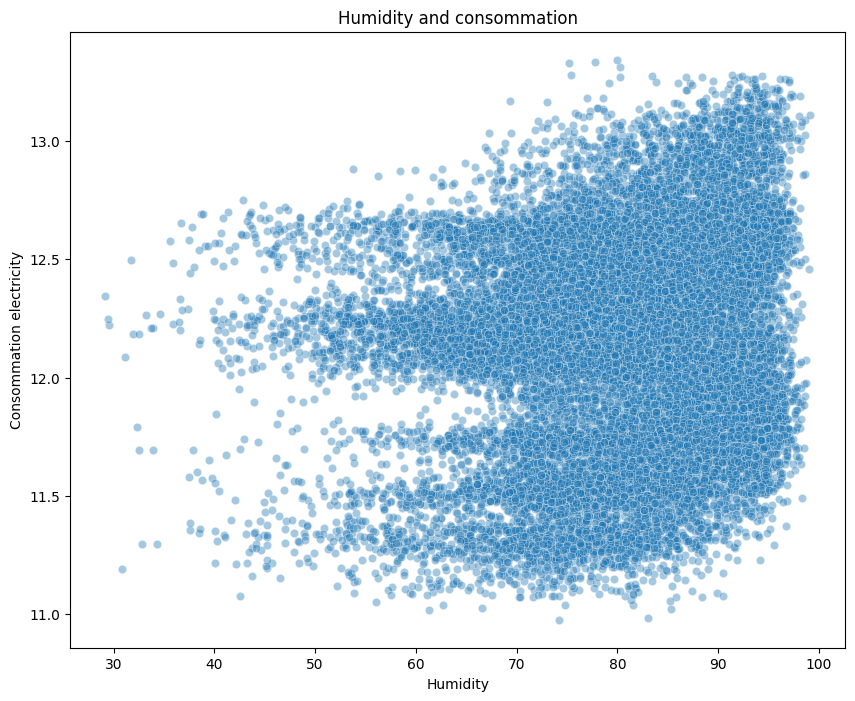

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="RH2M", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Humidity and consommation")
plt.xlabel("Humidity")
plt.ylabel("Consommation electricity")
plt.show()

In [18]:
labels = {
    "T2M": "Temperature (°C)",
    "RH2M": "Humidity (%)",
    "WS10M": "Wind Speed (m/s)",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation (W/m²)",
    "PRECTOTCORR": "Precipitation (mm/day)",
    "PS":"Pressure"
}


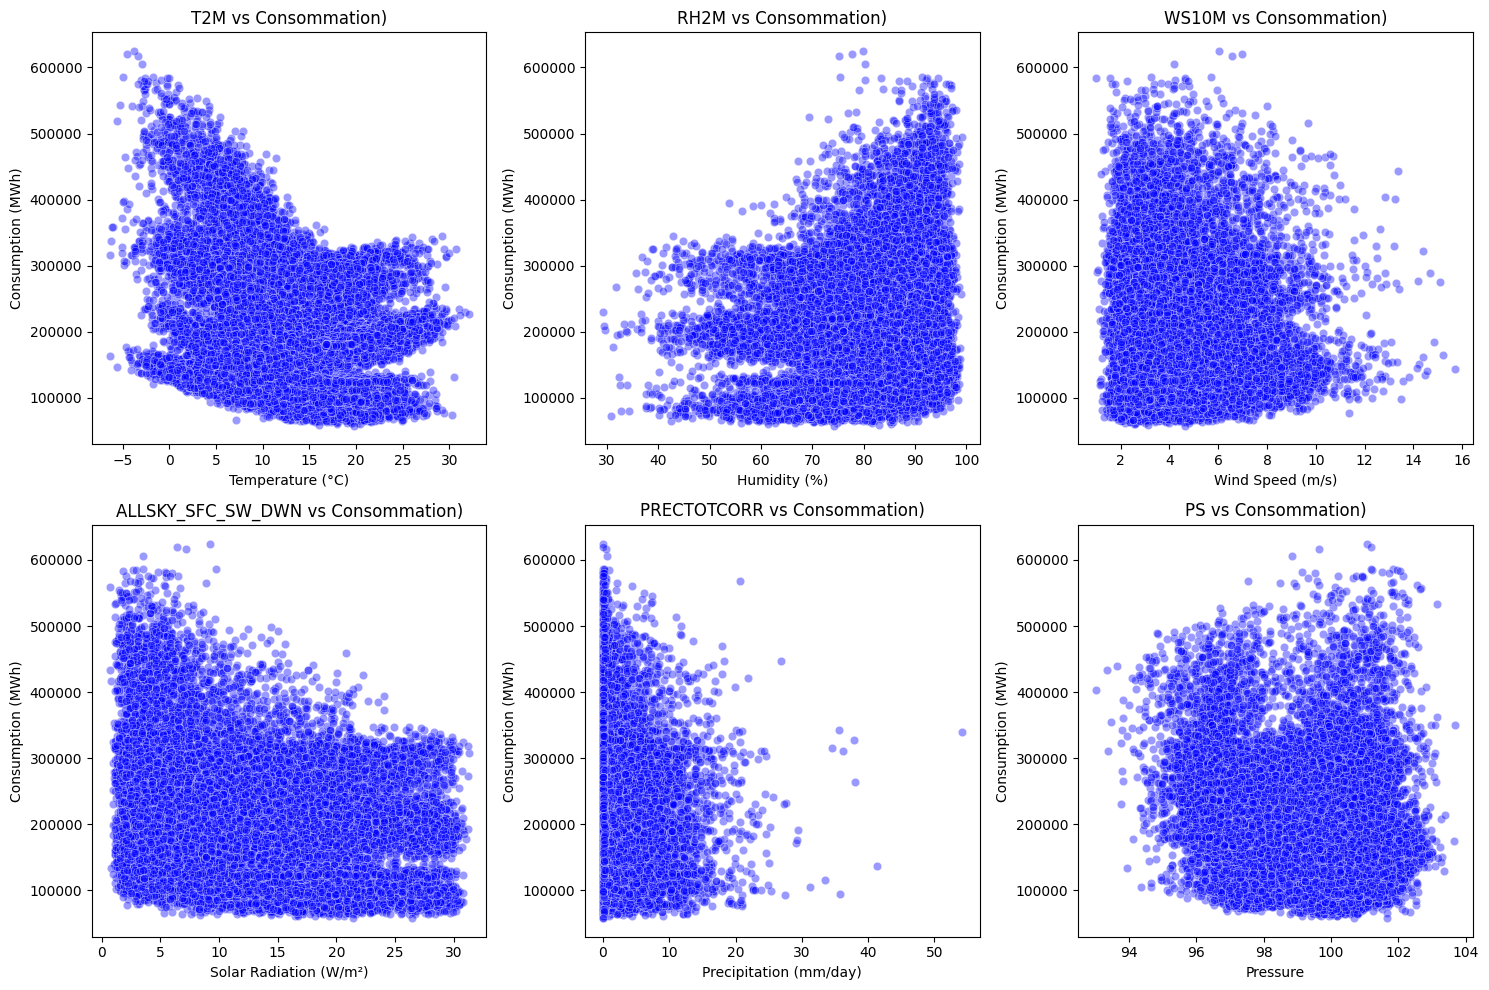

In [19]:
weather_vars = ["T2M", "RH2M", "WS10M", "ALLSKY_SFC_SW_DWN", "PRECTOTCORR","PS"]
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    plt.title(f"{var} vs Consommation)")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


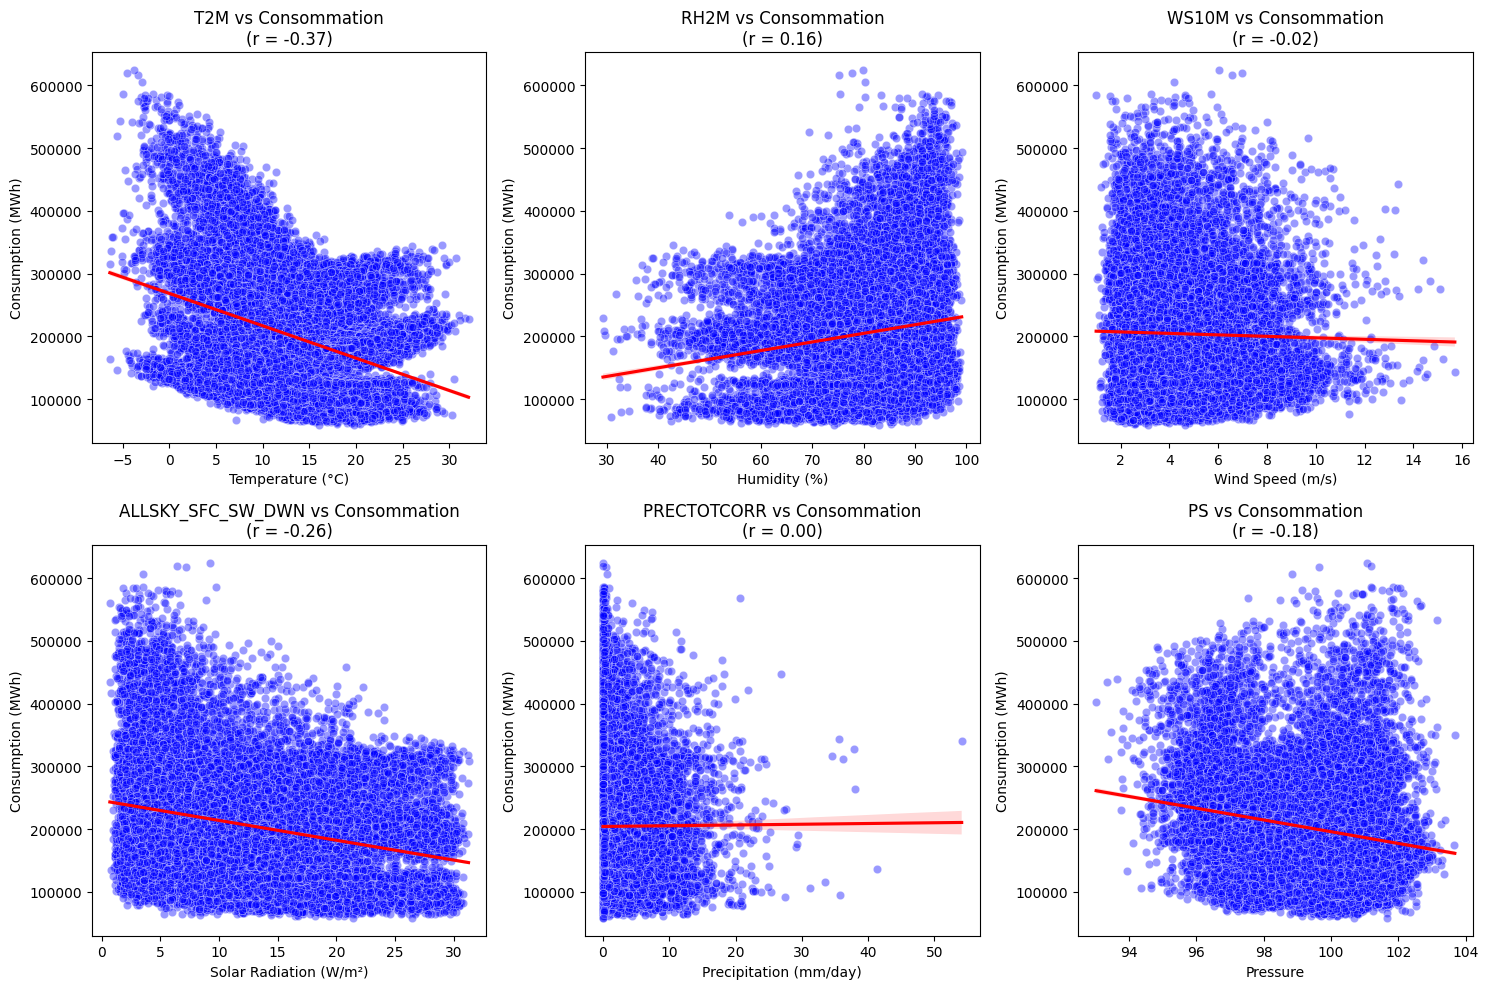

In [20]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    corr = df["Consommation"].corr(df[var])
    
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    sns.regplot(data=df, x=var, y="Consommation", scatter=False, color='red')
    
    plt.title(f"{var} vs Consommation\n(r = {corr:.2f})")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


### Regional comparison

### Mean comparison by regions

/tmp/ipykernel_4975/1455838715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


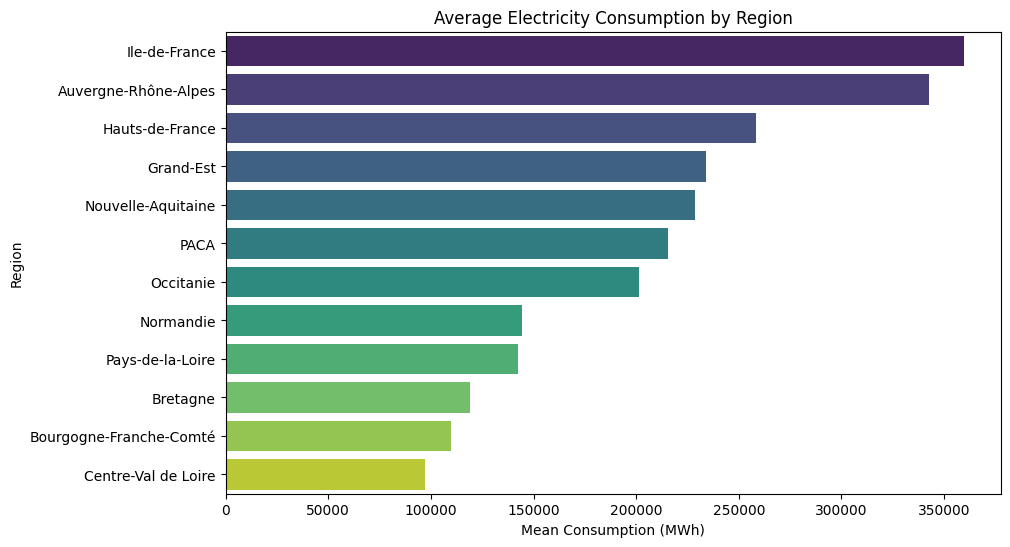

In [21]:
region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")
plt.title("Average Electricity Consumption by Region")
plt.xlabel("Mean Consumption (MWh)")
plt.ylabel("Region")
plt.show()


/tmp/ipykernel_4975/2395323793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")


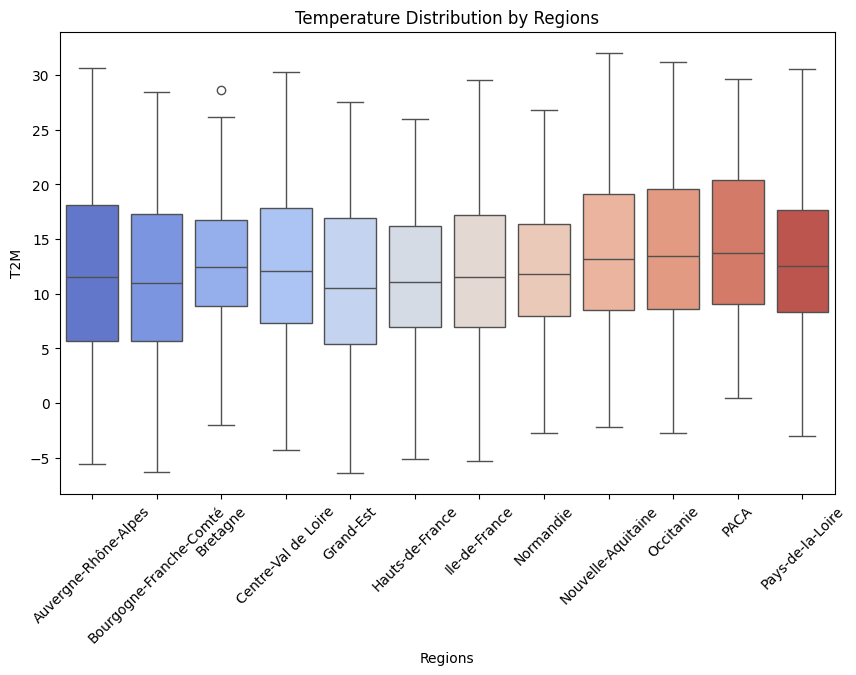

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")
plt.title("Temperature Distribution by Regions")
plt.xticks(rotation=45)
plt.show()


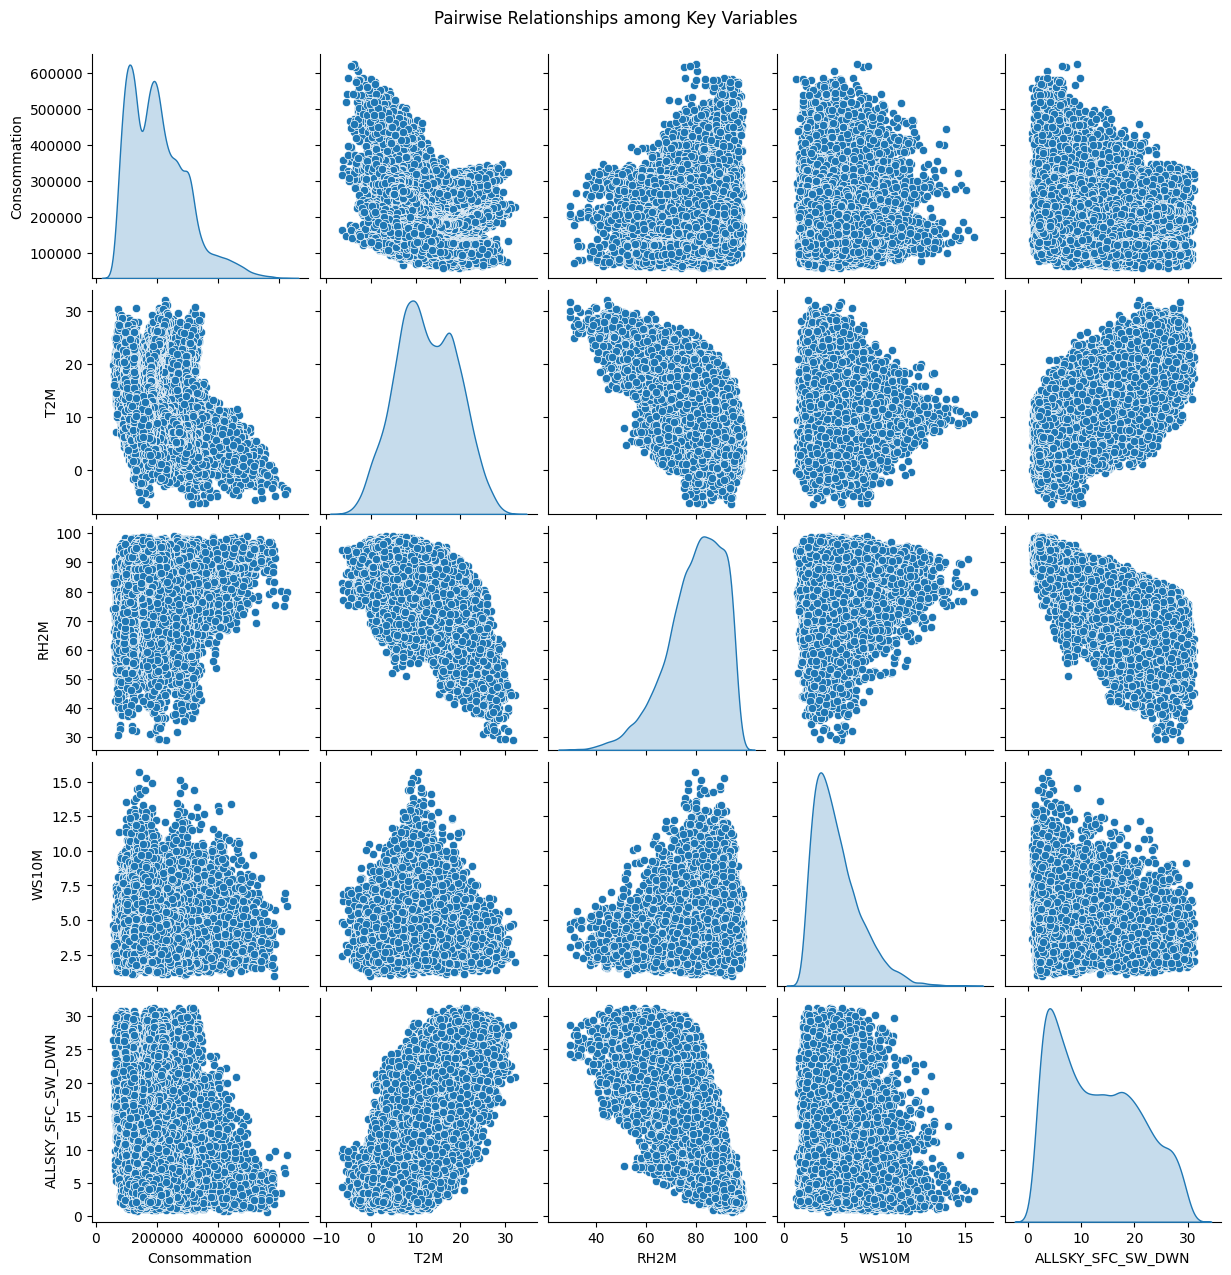

In [23]:
sns.pairplot(df[['Consommation', 'T2M', 'RH2M', 'WS10M', 'ALLSKY_SFC_SW_DWN']], diag_kind='kde')
plt.suptitle("Pairwise Relationships among Key Variables", y=1.02)
plt.show()

### Correlation heatmap

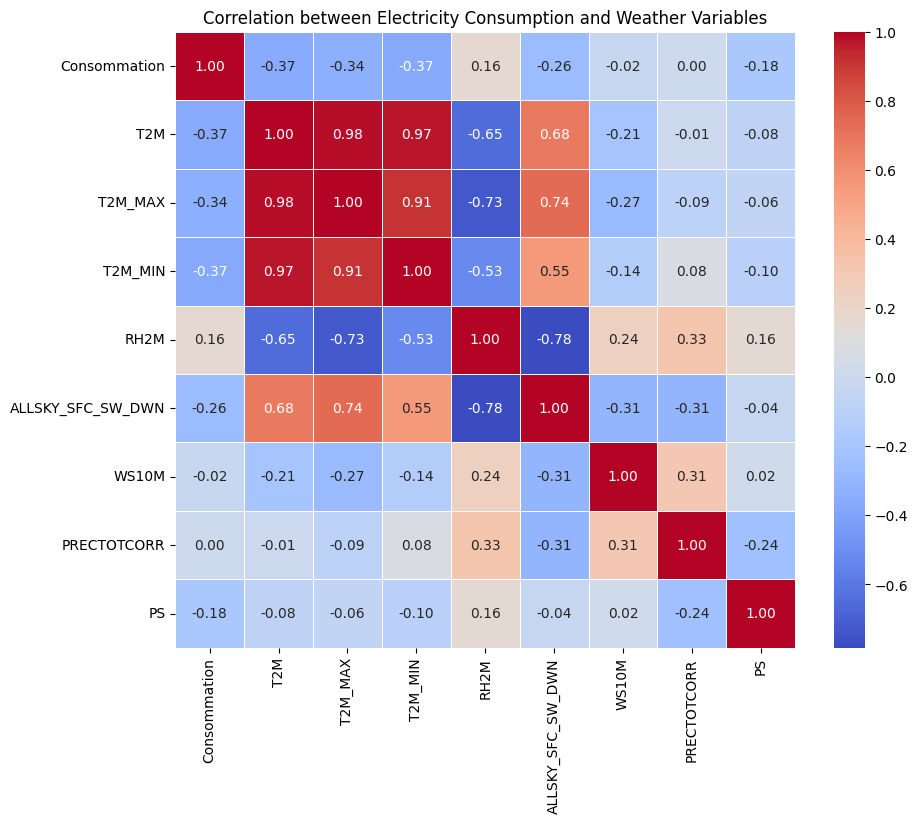

In [24]:
plt.figure(figsize=(10,8))
corr = df[['Consommation','T2M','T2M_MAX','T2M_MIN','RH2M','ALLSKY_SFC_SW_DWN','WS10M','PRECTOTCORR',"PS"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Electricity Consumption and Weather Variables")
plt.show()
